In [1]:
from datasets import load_dataset
import os

d:\Miniconda\envs\d3n\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dataset = load_dataset("jnlpba")

output = "../JNLPBA/"

os.makedirs(output, exist_ok=True)

dataset.save_to_disk(output)

Saving the dataset (1/1 shards): 100%|██████████| 3856/3856 [00:00<00:00, 193693.77 examples/s]


In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 18546
    })
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 3856
    })
})

In [7]:
train_dataset = dataset["train"]
valid_dataset = dataset["validation"]


In [8]:
len(train_dataset)

18546

In [9]:
entity_labels = [example["ner_tags"] for example in train_dataset]

In [10]:
from collections import Counter

entity_counts = Counter([label for sublist in entity_labels for label in sublist])

In [11]:
entity_counts

Counter({0: 382963,
         9: 30269,
         10: 24848,
         2: 15774,
         1: 9533,
         8: 8748,
         6: 7387,
         7: 6718,
         5: 3830,
         4: 1530,
         3: 951})

In [20]:
del entity_counts[0]

In [21]:
entity_counts

Counter({9: 30269,
         10: 24848,
         2: 15774,
         1: 9533,
         8: 8748,
         6: 7387,
         7: 6718,
         5: 3830,
         4: 1530,
         3: 951})

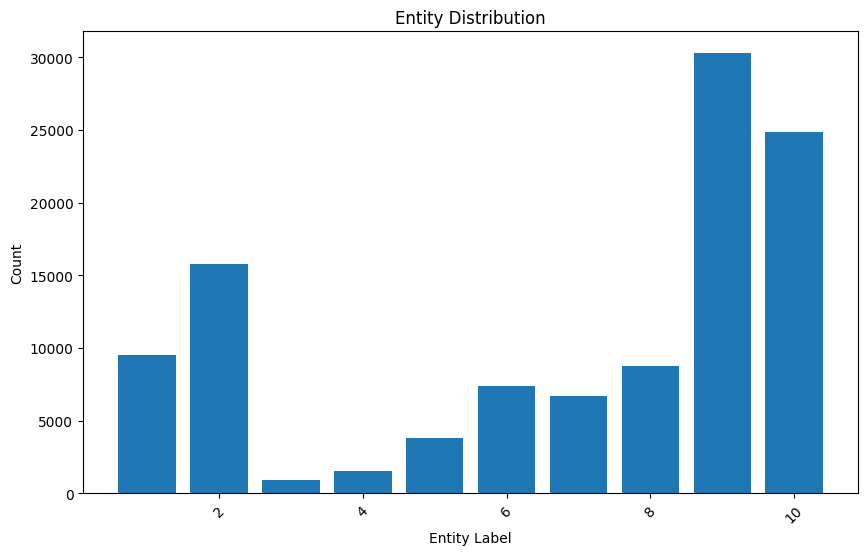

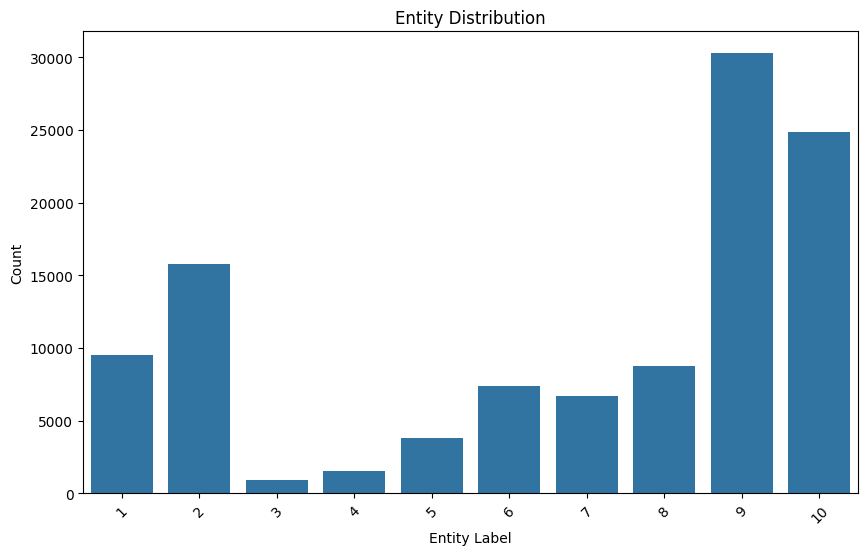

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming entity_counts is a dictionary with entity labels as keys and counts as values
entity_labels, counts = zip(*entity_counts.items())

# # Create a bar plot using Matplotlib
# plt.figure(figsize=(10, 6))
# plt.bar(entity_labels, counts)
# plt.xlabel("Entity Label")
# plt.ylabel("Count")
# plt.title("Entity Distribution")
# plt.xticks(rotation=45)
# plt.show()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=entity_labels, y=counts)
plt.xlabel("Entity Label")
plt.ylabel("Count")
plt.title("Entity Distribution")
plt.xticks(rotation=45)
plt.show()